# Introduction
The main objective here is to extract key performance indicators (KPIs) that will help to make data-driven decisions and improve company business. The data used in this case is Sales Data of Electronic Products in the USA.

# Question to Answer
1. What is the total number of sales?
2. What is the average sales per month?
3. What was the best month for sales? How much was earned that month?
4. What City had the highest number of sales?
5. What product sold the most? Why it sold the most?
6. What products are most often sold together?
7. What time should we display adverstisement to maximize likelihood of customer's buying product?

In [50]:
#Import the libraries
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [51]:
#Load the files

files = os.listdir('Sales_Data')

In [52]:
# Read the files

df = pd.DataFrame()

for i in files:
    data = pd.read_csv(os.path.join('Sales_Data', i))
    
    df = pd.concat([df, data])

In [53]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


# Cleaning Data

In [55]:
# check the null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [56]:
#Dropping the null values
df.dropna(inplace = True)

In [57]:
df.shape

(186305, 6)

In [58]:
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [59]:
filter_text = df['Quantity Ordered'] != 'Quantity Ordered'

df = df[filter_text]

In [60]:
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [61]:
df['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [62]:
#Convert this into the number datatype
df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')
df['Price Each'] = df['Price Each'].astype('float')

In [63]:
df['Price Each'].dtype

dtype('float64')

In [64]:
#Convert orderdate into the datetime datatype
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [65]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## Adding Month, Hour, Minute, Revenue and City Column from Existing Column

In [66]:
# Create the year, month, date, hour, minute separately

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df['Day'] = df['Order Date'].dt.day

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Day
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,19
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,7
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,12
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,12
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,30


In [68]:
df['Total_Sales'] = df['Quantity Ordered'] * df['Price Each']

In [69]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Day,Total_Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,19,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,7,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,12,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,12,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,30,11.99


In [70]:
# Create separate column for city

city = []

for i in df['Purchase Address']:
    c = i.split(',')[1]
    city.append(c)

In [71]:
df['City'] = city

In [72]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Day,Total_Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,19,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,7,99.99,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,12,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,12,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,30,11.99,Los Angeles


In [73]:
df.drop(['Order Date', 'Purchase Address'], axis = 1, inplace = True)

In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Day,Total_Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019,4,8,46,19,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019,4,22,30,7,99.99,Boston
3,176560,Google Phone,1.0,600.00,2019,4,14,38,12,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019,4,14,38,12,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019,4,9,27,30,11.99,Los Angeles


# Exploratory Data Analysis

## Some Basic Analysis

In [75]:
product_sales = df.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean', 'Total_Sales': 'sum'})
product_sales

,Quantity Ordered,Price Each,Total_Sales
Product,,,
20in Monitor,4129.0,109.99,454148.71
27in 4K Gaming Monitor,6244.0,389.99,2435097.56
27in FHD Monitor,7550.0,149.99,1132424.50
34in Ultrawide Monitor,6199.0,379.99,2355558.01
AA Batteries (4-pack),27635.0,3.84,106118.40
AAA Batteries (4-pack),31017.0,2.99,92740.83
Apple Airpods Headphones,15661.0,150.00,2349150.00
Bose SoundSport Headphones,13457.0,99.99,1345565.43
Flatscreen TV,4819.0,300.00,1445700.00


<Axes: title={'center': 'Sales Data Correlation'}>

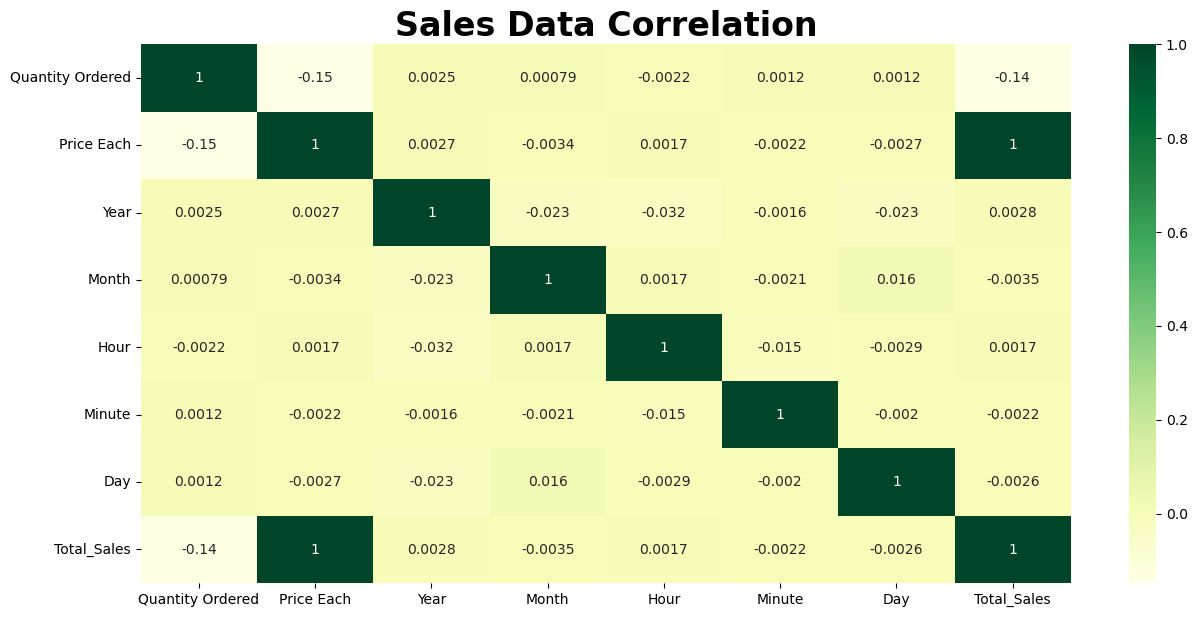

In [76]:
# Plot the Heatmap of Correlation Matrix to understand the relationship between different columns

plt.figure(figsize= (15,7))
plt.title("Sales Data Correlation", weight = 'bold', fontsize = 24)

cor = df.corr()
sns.heatmap(cor, annot = True, cmap = 'YlGn')

## Q1. What is the total number of sales?

In [77]:
year_sales = df.groupby('Year').agg({'Total_Sales' : 'sum'})

In [78]:
year_sales

,Total_Sales
Year,
2019,34483365.68
2020,8670.29


The total sales in the year 2019 were ***$34483365.68*** which is quite good

## Q2. What is the average sales per month?

In [79]:
avg_month_sales = df.groupby('Month').agg({'Total_Sales': 'mean'})
avg_month_sales

,Total_Sales
Month,
1,187.687376
2,183.884962
3,185.250471
4,185.495390
5,190.305852
6,190.187565
7,185.249826
8,187.648849
9,180.497387


In [81]:
px.bar(data_frame = avg_month_sales, x = avg_month_sales.index, y= avg_month_sales.Total_Sales, title = 'Average Sales for Each Month')

In 2019, May has the highest average revenue with *USD 190.3095* whereas September has the lowest average Revenue with *USD 180.4974*.

## Q3. What was the best month for sales? How much was earned that month?

In [82]:
total_month_sales = df.groupby('Month').agg({'Total_Sales': 'sum'})
total_month_sales

,Total_Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


In [83]:
px.bar(data_frame = total_month_sales, x = total_month_sales.index, y= total_month_sales.Total_Sales, title = 'Total Sales for Each Month')

From the above graoh we can tell that **December** is the best month for sales with **USD 4.6134M** total revenue.

## Q4. What City had the highest number of sales?

In [84]:
total_city_sales = df.groupby('City').agg({'Total_Sales': 'sum'})
total_city_sales

,Total_Sales
City,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80
New York City,4664317.43
Portland,2320490.61
San Francisco,8262203.91
Seattle,2747755.48


In [85]:
px.bar(data_frame = total_city_sales, x = total_city_sales.index, y= total_city_sales.Total_Sales, title = 'Total City Sales for Each Month')

**San Francisco** had the highest total sales in 2019 with **$8.2597M**

## Q5. What product sold the most? Why it sold the most?

In [86]:
product_sales = df.groupby('Product').agg({'Total_Sales': 'sum','Price Each': 'mean','Quantity Ordered': 'sum'}).sort_values(by='Total_Sales', ascending = False)
product_sales

,Total_Sales,Price Each,Quantity Ordered
Product,,,
Macbook Pro Laptop,8037600.00,1700.00,4728.0
iPhone,4794300.00,700.00,6849.0
ThinkPad Laptop,4129958.70,999.99,4130.0
Google Phone,3319200.00,600.00,5532.0
27in 4K Gaming Monitor,2435097.56,389.99,6244.0
34in Ultrawide Monitor,2355558.01,379.99,6199.0
Apple Airpods Headphones,2349150.00,150.00,15661.0
Flatscreen TV,1445700.00,300.00,4819.0
Bose SoundSport Headphones,1345565.43,99.99,13457.0


In [87]:
product_sales.columns = [x.replace(' ','_') for x in product_sales.columns]
product_sales.columns

Index(['Total_Sales', 'Price_Each', 'Quantity_Ordered'], dtype='object')

In [88]:
px.bar(data_frame = product_sales, x = product_sales.index, y = product_sales.Quantity_Ordered , color = 'Total_Sales', title='Anayzing Product Sales Based on Quantity Ordered & their Revenue')

From the graph above we can tell that The most sold product was AAA Batteries (4-pack) (31.012k). We also can tell that AA Batteries (4-pack), USB-C Charging Cable, Lightning Charging Cable, and Wired Headphones sold more than other products. These products probably sold the most because it is an item that is needed often and is relatively cheap.

## Q6. What products are most often sold together?

In [89]:
# Import libraries to count combination of products
from itertools import combinations
from collections import Counter

In [90]:
# Dropping duplicate values of 'Order ID' using duplicate() function
data = df.loc[df['Order ID'].duplicated(keep = False)]
data

,Order ID,Product,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Day,Total_Sales,City
3,176560,Google Phone,1.0,600.00,2019,4,14,38,12,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019,4,14,38,12,11.99,Los Angeles
18,176574,Google Phone,1.0,600.00,2019,4,19,42,3,600.00,Los Angeles
19,176574,USB-C Charging Cable,1.0,11.95,2019,4,19,42,3,11.95,Los Angeles
30,176585,Bose SoundSport Headphones,1.0,99.99,2019,4,11,31,7,99.99,Boston
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1.0,3.84,2019,9,20,18,20,3.84,Atlanta
11639,259314,Wired Headphones,1.0,11.99,2019,9,0,25,16,11.99,Atlanta
11640,259314,AAA Batteries (4-pack),2.0,2.99,2019,9,0,25,16,5.98,Atlanta
11677,259350,Google Phone,1.0,600.00,2019,9,13,49,30,600.00,San Francisco


In [91]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Year',
       'Month', 'Hour', 'Minute', 'Day', 'Total_Sales', 'City'],
      dtype='object')

In [92]:
# Joining product ordered with the same 'Order ID' in the new column called 'Grouped'
data['Grouped'] = data.groupby(['Order ID'])['Product'].transform(lambda x: ' ,'.join(x))

In [93]:
data['Grouped']

3                           Google Phone ,Wired Headphones
4                           Google Phone ,Wired Headphones
18                      Google Phone ,USB-C Charging Cable
19                      Google Phone ,USB-C Charging Cable
30       Bose SoundSport Headphones ,Bose SoundSport He...
                               ...                        
11628        34in Ultrawide Monitor ,AA Batteries (4-pack)
11639             Wired Headphones ,AAA Batteries (4-pack)
11640             Wired Headphones ,AAA Batteries (4-pack)
11677                   Google Phone ,USB-C Charging Cable
11678                   Google Phone ,USB-C Charging Cable
Name: Grouped, Length: 14649, dtype: object

In [94]:
# Creating a new variable for Counter
count = Counter()

# Creating a loop to count all the 2 product bundles
for i in data['Grouped']:
    r = i.split(',')
    count.update(Counter(combinations(r, 2)))
    
# Creating another loop to display the 10 most often products that sold together
for k, v in count.most_common(20):
    print(k, v)

('iPhone ', 'Lightning Charging Cable') 1776
('Google Phone ', 'USB-C Charging Cable') 1722
('iPhone ', 'Wired Headphones') 971
('Google Phone ', 'Wired Headphones') 916
('iPhone ', 'Apple Airpods Headphones') 701
('Vareebadd Phone ', 'USB-C Charging Cable') 624
('USB-C Charging Cable ', 'Wired Headphones') 428
('Google Phone ', 'Bose SoundSport Headphones') 415
('Google Phone ', 'USB-C Charging Cable ') 394
('iPhone ', 'Lightning Charging Cable ') 364
('Vareebadd Phone ', 'Wired Headphones') 318
('Lightning Charging Cable ', 'Wired Headphones') 240
('Lightning Charging Cable ', 'Apple Airpods Headphones') 197
('USB-C Charging Cable ', 'Bose SoundSport Headphones') 187
('Apple Airpods Headphones ', 'Wired Headphones') 165
('Vareebadd Phone ', 'Bose SoundSport Headphones') 162
('Vareebadd Phone ', 'USB-C Charging Cable ') 149
('Bose SoundSport Headphones ', 'Wired Headphones') 140
('Lightning Charging Cable ', 'USB-C Charging Cable') 120
('Lightning Charging Cable ', 'AA Batteries (4-pa

We can see the most often products that sold together are **iPhone** and **Lightning Charging Cable** with 1774 transactions. **Google Phone** and **USB-C Charging Cable** came second with 1722 transactions.

With this information we could offer a smart deal bundle to the customer that buys iPhone, we could recommend the Lightning Charging Cable with a discount. We also can bundle the remaining products with good marketing strategies.

## Q7. What time should we display adverstisement to maximize likelihood of customer's buying product?

In [95]:
hourly_sales = df.groupby('Hour').agg({'Quantity Ordered': 'sum', 'Total_Sales': 'sum'})
hourly_sales

,Quantity Ordered,Total_Sales
Hour,,
0,4428.0,713721.27
1,2619.0,460866.88
2,1398.0,234851.44
3,928.0,145757.89
4,937.0,162661.01
5,1493.0,230679.82
6,2810.0,448113.00
7,4556.0,744854.12
8,7002.0,1192348.97


In [96]:
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=hourly_sales.index, y=hourly_sales['Total_Sales'])])
fig.show()

We can see that there are 2 peak hours in the data. They are **12 (12 PM)** and **19 (7 PM)**. This makes sense since most people got some spare time for shopping during these hours. With this information, I recommend advertising the product at 9—11 AM and 4—6 PM.

# Conclusion
* The total sales in 2019 were USD 34.483.365 with 209.038 products sold.
* May has the highest average revenue with USD 190.305852, while September has the lowest average revenue with USD 180.497387.
* December is the best month for sales with USD 4.613.443 total revenue.
* San Francisco had the highest total sales in 2019 with USD 8.259.719 total revenue.
* AAA Batteries (4-pack) are the most sold product with 31.012 products ordered.
* iPhone and Lightning Charging Cable are the most often products sold together with 1004 transactions, Google Phone and USB-C Charging Cable came second with 987 transactions.
* I recommend advertising the product before 12 PM and 7 PM, which could be at 9—11 AM and 4—6 PM.